In [6]:
import pandas as pd
import time

df = pd.DataFrame()

weekly_base_url = "https://raw.githubusercontent.com/fantasydatapros/data/master/weekly/2020/week{week}.csv"

for week in range(1,18):
    week_df = pd.read_csv(weekly_base_url.format(week=week))
    week_df['Week'] = week
    week_df['Season'] = 2020
    df = pd.concat([df,week_df])

print(df.shape)
df.head()

(22974, 22)


,Unnamed: 0,Player,Pos,Tm,PassingYds,PassingTD,Int,PassingAtt,Cmp,RushingAtt,...,Rec,Tgt,ReceivingYds,ReceivingTD,FL,PPRFantasyPoints,StandardFantasyPoints,HalfPPRFantasyPoints,Week,Season
0,0.0,Demarcus Robinson,WR,KAN,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,6.0,20.0,0.0,0.0,5.0,2.0,3.5,1,2020
1,1.0,Travis Kelce,TE,KAN,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,6.0,50.0,1.0,0.0,17.0,11.0,14.0,1,2020
2,2.0,Tanoh Kpassagnon,DEF,KAN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2020
3,3.0,L'Jarius Sneed,DEF,KAN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2020
4,4.0,Frank Clark,DEF,KAN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2020


In [7]:
df['Pos'].unique()

array(['WR', 'TE', 'DEF', 'RB', 'OL', 'K', 'QB', 'P', '0'], dtype=object)

In [8]:
off_skill_pos = ['QB', 'RB', 'WR', 'TE']

df = df.loc[df['Pos'].isin(off_skill_pos)]

print(df.shape)
df.head(10)

(6541, 22)


,Unnamed: 0,Player,Pos,Tm,PassingYds,PassingTD,Int,PassingAtt,Cmp,RushingAtt,...,Rec,Tgt,ReceivingYds,ReceivingTD,FL,PPRFantasyPoints,StandardFantasyPoints,HalfPPRFantasyPoints,Week,Season
0,0.0,Demarcus Robinson,WR,KAN,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,6.0,20.0,0.0,0.0,5.00,2.00,3.50,1,2020
1,1.0,Travis Kelce,TE,KAN,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,6.0,50.0,1.0,0.0,17.00,11.00,14.00,1,2020
6,6.0,Clyde Edwards-Helaire,RB,KAN,0.0,0.0,0.0,0.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,19.80,19.80,19.80,1,2020
15,15.0,Darrel Williams,RB,KAN,0.0,0.0,0.0,0.0,0.0,7.0,...,2.0,2.0,7.0,0.0,0.0,5.00,3.00,4.00,1,2020
17,17.0,Darwin Thompson,RB,KAN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,1,2020
24,24.0,Tyreek Hill,WR,KAN,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,6.0,46.0,1.0,0.0,15.60,10.60,13.10,1,2020
25,25.0,Byron Pringle,WR,KAN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,1,2020
26,26.0,Nick Keizer,TE,KAN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,1,2020
27,27.0,Patrick Mahomes,QB,KAN,211.0,3.0,0.0,32.0,24.0,0.0,...,0.0,0.0,0.0,0.0,0.0,20.44,20.44,20.44,1,2020
30,30.0,Anthony Sherman,RB,KAN,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.20,0.20,0.20,1,2020


In [10]:
import numpy as np

col = ['Player', 'Tm', 'Pos', 'Season', 'Week', 'HalfPPRFantasyPoints']

v2_df = df[col]

v2_df = v2_df.groupby(['Player', 'Tm', 'Pos', 'Season'], as_index = False).agg({
    'HalfPPRFantasyPoints':np.mean
})

v2_df.head(10)

,Player,Tm,Pos,Season,HalfPPRFantasyPoints
0,A.J. Brown,OTI,WR,2020,14.735714
1,A.J. Green,CIN,WR,2020,5.487500
2,A.J. McCarron,HTX,QB,2020,0.400000
3,AJ Dillon,GNB,RB,2020,3.510000
4,Aaron Jones,GNB,RB,2020,16.814286
5,Aaron Rodgers,GNB,QB,2020,23.922500
6,Adam Humphries,OTI,WR,2020,6.614286
7,Adam Shaheen,MIA,TE,2020,2.437500
8,Adam Thielen,MIN,WR,2020,14.333333
9,Adam Trautman,NOR,TE,2020,2.040000


In [12]:
v2_df = v2_df.replace({
    'Tm':{
        'OTI':'TEN',
        'HTX':'HOU'
    }
})

v2_df.head(10)

,Player,Tm,Pos,Season,HalfPPRFantasyPoints
0,A.J. Brown,TEN,WR,2020,14.735714
1,A.J. Green,CIN,WR,2020,5.487500
2,A.J. McCarron,HOU,QB,2020,0.400000
3,AJ Dillon,GNB,RB,2020,3.510000
4,Aaron Jones,GNB,RB,2020,16.814286
5,Aaron Rodgers,GNB,QB,2020,23.922500
6,Adam Humphries,TEN,WR,2020,6.614286
7,Adam Shaheen,MIA,TE,2020,2.437500
8,Adam Thielen,MIN,WR,2020,14.333333
9,Adam Trautman,NOR,TE,2020,2.040000


In [13]:
pos_map = {
    'QB': 1,
    'RB': 2,
    'WR': 3,
    'TE': 2
}

def get_top_n_player_pos(df, pos, n):
    df = df.loc[df['Pos'] == pos]

    return df.groupby('Tm', as_index=False).apply(
        lambda x: x.nlargest(n, ['HalfPPRFantasyPoints']).min()
    )

corr_df = pd.DataFrame(columns=col)

for pos, pos_spots in pos_map.items():
    for n in range(1, pos_spots+1):
        pos_df = get_top_n_player_pos(v2_df, pos, n)
        pos_df = pos_df.rename({
            'HalfPPRFantasyPoints': f'{pos}{n}'
        }, axis=1)
        corr_df = pd.concat([corr_df, pos_df], axis=1)

corr_df = corr_df.dropna(axis=1)
corr_df = corr_df.drop(['Pos', 'Player', 'Season', 'Tm'], axis=1)

print(corr_df.shape)
corr_df.head(32)

(32, 8)


,QB1,RB1,RB2,WR1,WR2,WR3,TE1,TE2
0,17.527500,10.046667,5.181250,15.633333,13.400000,9.066250,7.568750,0.612500
1,24.430769,7.781250,7.276923,16.568750,11.100000,8.922222,4.583333,3.590000
2,15.950667,27.266667,14.100000,11.900000,11.573333,10.918750,1.906250,0.546667
3,15.180000,15.720000,4.833333,13.243750,7.475000,5.262500,7.412500,3.000000
4,17.372000,14.850000,8.412500,10.209333,10.068750,5.487500,9.350000,3.681250
5,15.382500,16.641667,12.468750,10.760000,10.130667,7.876923,6.961538,3.320000
6,14.872500,15.653333,10.012500,8.946667,7.181250,6.069231,5.330769,4.635714
7,23.671250,11.980000,8.843750,13.873333,8.742857,5.308333,2.525000,1.745455
8,26.228000,13.046667,6.668750,11.800000,10.793750,8.987500,7.187500,1.700000
9,13.793846,12.160000,5.681818,9.046667,8.100000,8.100000,7.753333,5.900000


In [14]:
# we can find our correlation matrix by using the corr method
# pandas.DataFrame.corr documentation
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
# the corr method also has the capability of calculating spearman-rank correlation, which is interesting too.
corr_df.corr()

,QB1,RB1,RB2,WR1,WR2,WR3,TE1,TE2
QB1,1.000000,0.056504,-0.079493,0.462651,0.065309,0.004974,0.143843,-0.025955
RB1,0.056504,1.000000,0.238527,0.034831,0.250325,-0.006248,-0.098090,-0.021426
RB2,-0.079493,0.238527,1.000000,-0.105630,-0.030811,-0.054347,-0.242558,0.169455
WR1,0.462651,0.034831,-0.105630,1.000000,0.311505,0.139344,0.203313,-0.131783
WR2,0.065309,0.250325,-0.030811,0.311505,1.000000,0.464112,-0.269737,0.137982
WR3,0.004974,-0.006248,-0.054347,0.139344,0.464112,1.000000,-0.122846,-0.005113
TE1,0.143843,-0.098090,-0.242558,0.203313,-0.269737,-0.122846,1.000000,0.065958
TE2,-0.025955,-0.021426,0.169455,-0.131783,0.137982,-0.005113,0.065958,1.000000


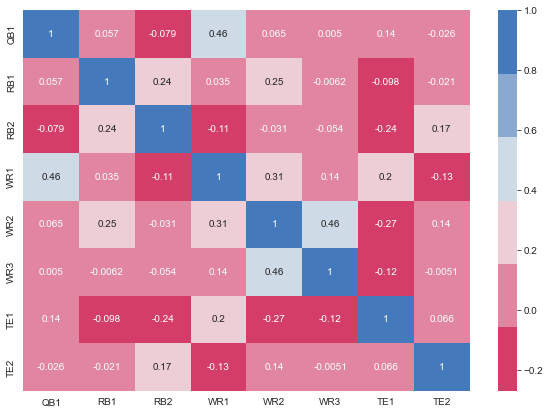

In [15]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_style('whitegrid');

plt.figure(figsize=(10,7))

sns.heatmap(corr_df.corr(), annot=True, cmap=sns.diverging_palette(0, 250));

The purpose of this heatmap is to determine if "stacking" (starting multiple players on the same team in a given week) has any value in positive outcomes. For example, by starting multiple players of the same team in a game, if that team has a week of high offensive production, there is a greater chance that both of your stacked players will benefit, thus boosting your fantasy score for the week. However, this can also bust as if the opposite happens, those stacked players will have lower fantasy scores for the week. This correlation matrix shows us pairwire correlations for all startable offensive players in a half-point PPR league. 
From this heatmap/correlation matrix, we see two unique correlation scores of 0.46. Though this correlation is not very strong (none of them are in this 2020 season data sample), for arguments sake, let's assume that the positive correlation scores are significant; we can see that there is a positive correlation in stacking the pairs of WR2/WR3 and QB1/WR1. This tells us that playing such pairings could help increase weekly fantasy score. I could foresee utilizing this information on weeks where I am projected to lose to my appointment by a considerable amount. I could theoretically find a game with a high over/under in favor of the QB/WR matchup that I can play. 